![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Introducción a Redes Neuronales con Keras
### Usando Keras, se creará una neurona simple con dos pesos, un bias y la función sigmoid como función de activación.


# Modelo de una neurona

![perceptron](https://drive.google.com/uc?export=view&id=1Z4GnmBVNU5Sdd0DJgs0aSkaeGYyUmDYz)
### https://platzi.com/tutoriales/1157-ia-2017/2619-entrenamiento-del-perceptron/

# Se cargan las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Se hará uso de Keras para la programación de redes neuronales
import keras
# Sequential permite agregar capas de neuronas de manera secuencial
from keras.models import Sequential
# Dense crea redes neuronales completamente conectadas (fully connected)
from keras.layers import Dense
from keras.optimizers import Adam

# Se carga como dataframe un dataset de prueba
### Las variables independientes son la altura del tope y distancia al tope
### La etiqueta es baja velocidad (0) o alta velocidad (1)

In [4]:
speed_data = pd.read_csv("speed_decision_data.csv")
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


In [5]:
speed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   1 - Distance From Bump  1000 non-null   float64
 1   Height of Bump          1000 non-null   float64
 2   Speed                   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


# Se muestran los datos en una gráfica de dispersión

<Axes: xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

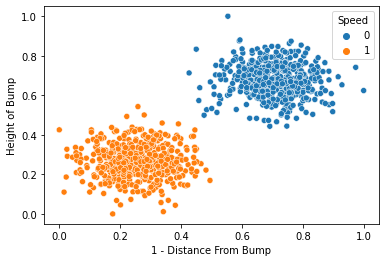

In [6]:
sns.scatterplot(x= speed_data['1 - Distance From Bump'], y = speed_data['Height of Bump'], hue = speed_data['Speed'])

# Se crean los set de datos y etiquetas para entrenamiento
### En este ejemplo no hay set de prueba

In [7]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]
y_train = speed_data['Speed']

# Se define la única neurona con Keras, dos entradas y una salida
### Sequential permite agregar capas de neuronas de manera secuencial
### La función de activación es Sigmoid
### La *loss function* es binaria dada la clasificación deseada
### El optimizador Adam es el recomendado
###  

In [8]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

### Se entrena el modelo con 100 épocas, batch de 50 y shuffle activado

In [9]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
20/20 - 3s - loss: 0.6173 - accuracy: 0.5810 - 3s/epoch - 150ms/step
Epoch 2/100
20/20 - 0s - loss: 0.5835 - accuracy: 0.6610 - 45ms/epoch - 2ms/step
Epoch 3/100
20/20 - 0s - loss: 0.5523 - accuracy: 0.7900 - 36ms/epoch - 2ms/step
Epoch 4/100
20/20 - 0s - loss: 0.5229 - accuracy: 0.8670 - 35ms/epoch - 2ms/step
Epoch 5/100
20/20 - 0s - loss: 0.4964 - accuracy: 0.9090 - 36ms/epoch - 2ms/step
Epoch 6/100
20/20 - 0s - loss: 0.4713 - accuracy: 0.9440 - 37ms/epoch - 2ms/step
Epoch 7/100
20/20 - 0s - loss: 0.4475 - accuracy: 0.9630 - 35ms/epoch - 2ms/step
Epoch 8/100
20/20 - 0s - loss: 0.4253 - accuracy: 0.9790 - 36ms/epoch - 2ms/step
Epoch 9/100
20/20 - 0s - loss: 0.4044 - accuracy: 0.9850 - 37ms/epoch - 2ms/step
Epoch 10/100
20/20 - 0s - loss: 0.3848 - accuracy: 0.9910 - 36ms/epoch - 2ms/step
Epoch 11/100
20/20 - 0s - loss: 0.3669 - accuracy: 0.9930 - 36ms/epoch - 2ms/step
Epoch 12/100
20/20 - 0s - loss: 0.3498 - accuracy: 0.9960 - 40ms/epoch - 2ms/step
Epoch 13/100
20/20 - 0s -

In [10]:
# resumen del model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# Se grafican el error y la exactitud del modelo

Text(0.5, 0, 'Epoca')

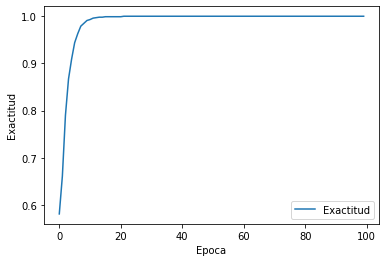

In [11]:
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

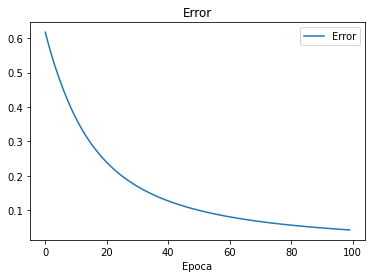

In [12]:
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

# Se visualizan los resultados del entrenamiento

313/313 [==============================] - 0s 1ms/step


<ipython-input-13-c82469e57554>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


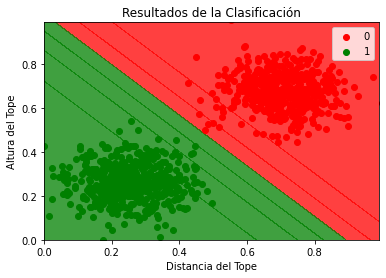

In [13]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train.values, y_train.values

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Resultados de la Clasificación')
plt.xlabel('Distancia del Tope')
plt.ylabel('Altura del Tope')
plt.legend()
plt.show()

# Se imprimen los parámetros del modelo
### Layer 0 es la primera y única neurona del modelo

In [14]:
weights, biases = model.layers[0].get_weights()
print(weights)
print(biases)

[[-9.033662 ]
 [-7.8428683]]
[7.8638353]


# Se somete a prueba el modelo con un dato arbitrario

In [16]:
dist = 0.7
alt = 0.7
dato = np.array([[dist, alt]])
prediccion = model.predict(dato)
print("Resultado: ",prediccion)

1/1 [==============================] - 0s 51ms/step
Resultado:  [[0.01889586]]


# Gracias por la atención